In [1]:
# Imports
import string
import numpy as np
import pandas as pd


In [2]:
df =pd.read_csv('data.csv')

C:\Users\ling\AppData\Local\Temp\ipykernel_25268\3523767159.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('data.csv')


# Part 1 – Data Preparation and Preprocessing. [15 points]

### 1. Describe the dataset. (8 points)

In [3]:
# Descrive the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [4]:
# Number of records
df.shape[0]

318477

In [5]:
# period and different dates of job postings
df['Date'] = pd.to_datetime(df.Date)

unique_date = df['Date'].nunique()

print('Started Date:', df.Date.min(), '\n','Ended Date:', df.Date.max(),'\n')
print(unique_date)

Started Date: 2018-10-01 00:00:00+00:00 
 Ended Date: 2019-03-13 00:00:00+00:00 

163


In [6]:
# total location & most job postings
location = df['Location'].value_counts()
total_location = len(location)
most_location= location.idxmax()

print('Total location:', total_location)
print('Location with most hob postings:', most_location )

Total location: 65
Location with most hob postings: Sydney


In [7]:
job_sector = df['Classification'].value_counts()
print('Total job sector:', len(job_sector), '\n')
print('Total of classification:', '\n', job_sector)

Total job sector: 30 

Total of classification: 
 Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications            

In [8]:
ict_df = df[df['Classification']=='Information & Communication Technology']
print('Total of sub-sector in ICT:', '\n', ict_df['SubClassification'].value_counts())

Total of sub-sector in ICT: 
 Developers/Programmers                   4211
Business/Systems Analysts                2986
Programme & Project Management           2413
Architects                               1548
Engineering - Software                   1437
Help Desk & IT Support                   1374
Networks & Systems Administration        1194
Consultants                              1149
Other                                     997
Testing & Quality Assurance               831
Security                                  774
Management                                746
Engineering - Network                     552
Database Development & Administration     551
Web Development & Production              452
Sales - Pre & Post                        449
Product Management & Development          376
Telecommunications                        357
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing                          97
Comp

In [9]:
print('Lowest Salary:', df['LowestSalary'].value_counts(ascending=True), '\n')
print('Highest Salary:', df['HighestSalary'].value_counts(ascending=True))

Lowest Salary: 200    11411
30     23476
80     24249
120    24514
150    25841
50     27027
100    27673
60     28499
70     28712
40     34436
0      62639
Name: LowestSalary, dtype: int64 

Highest Salary: 999    11411
40     23476
100    24249
150    24514
200    25841
60     27027
120    27673
70     28499
80     28712
50     34436
30     62639
Name: HighestSalary, dtype: int64


In [10]:
df.groupby('JobType').agg({'LowestSalary':'min','HighestSalary':'max'})

,LowestSalary,HighestSalary
JobType,,
Casual/Vacation,0,999
Contract/Temp,0,999
Full Time,0,999
Part Time,0,999


### 2. Normalize and clean data. (7 points) 

In [11]:
# Sum of Average Salary by Classification
df['AverageSalary'] = (df['LowestSalary']+df['HighestSalary'])/2
Classification_salary = df.groupby('Classification').agg({'AverageSalary': 'count'}).sort_values(by='AverageSalary', ascending=True)
Classification_salary

,AverageSalary
Classification,
Self Employment,93
"Advertising, Arts & Media",833
CEO & General Management,844
"Farming, Animals & Conservation",882
Science & Technology,905
Sport & Recreation,984
Consulting & Strategy,1206
Insurance & Superannuation,1474
Design & Architecture,1811


In [12]:
# keep 8 number int 
df['Id'] = df['Id'].astype(str).str.extract(r'(\d{8})')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [ ]:
# 

# Part 2 – Data Understanding. [5 points]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'job distribution by average salry')

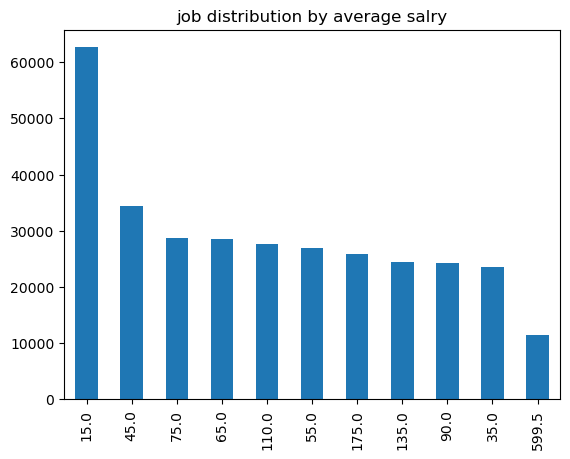

In [14]:
# the total jobs of each range
salary_range_counts = df['AverageSalary'].value_counts()
salary_range_counts.plot(kind='bar')
plt.title('job distribution by average salry')

# Part 3 – Data Analysis and Visualisation. [6 points]

### 1. Analyse by comparison. (2 points) 

### 2. Analyse by time. (2 points) 

### 3. Forecasting and skill extractions. (2 points) 